In [1]:
import pandas as pd

In [2]:
from google.colab import drive

drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [3]:
df2 = pd.read_csv("/content/gdrive/MyDrive/빅콘 군집분석/cluster_type2.csv")

In [4]:
df2 = df2.drop('Unnamed: 0', axis = 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df2) 
df = scaler.transform(df2)

In [6]:
df = pd.DataFrame(df, columns = df2.columns)

## K-means

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370435 entries, 0 to 370434
Data columns (total 45 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   event_CompleteIDCertification          370435 non-null  float64
 1   event_EndLoanApply                     370435 non-null  float64
 2   event_GetCreditInfo                    370435 non-null  float64
 3   event_Login                            370435 non-null  float64
 4   event_OpenApp                          370435 non-null  float64
 5   event_SignUp                           370435 non-null  float64
 6   event_StartLoanApply                   370435 non-null  float64
 7   event_UseDSRCalc                       370435 non-null  float64
 8   event_UseLoanManage                    370435 non-null  float64
 9   event_UsePrepayCalc                    370435 non-null  float64
 10  event_ViewLoanApplyIntro               370435 non-null  

In [7]:
import matplotlib.pyplot as plt

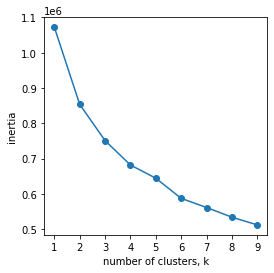

In [8]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [22]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 5, random_state = 42 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

         0         1         2         3         4         5         6   \
0  0.004562  0.003316  0.005571  0.005994  0.007216  0.001573  0.007764   
1  0.003157  0.002491  0.003793  0.003428  0.004466  0.001746  0.004755   
2  0.005036  0.003792  0.005572  0.005374  0.007066  0.001995  0.008127   
3  0.001919  0.001440  0.002853  0.002499  0.003541  0.001625  0.003328   
4  0.005790  0.004514  0.006075  0.006005  0.007970  0.002129  0.009366   

         7         8         9   ...        35        36        37        38  \
0  0.000598  0.003505  0.000394  ...  0.052641  0.561547  0.000535  0.009556   
1  0.000224  0.002318  0.000448  ...  0.089577  0.641101  0.002200  0.026678   
2  0.000498  0.003695  0.000821  ...  0.038873  0.570195  0.000908  0.046378   
3  0.000643  0.001908  0.000870  ...  0.056911  0.537892  0.008170  0.040718   
4  0.000448  0.004217  0.000865  ...  0.035050  0.613143  0.001056  0.017094   

         39        40            41            42        43         

In [23]:
clust_df = df.copy()
clust_df['clust'] = pred
clust_df.head()

,event_CompleteIDCertification,event_EndLoanApply,event_GetCreditInfo,event_Login,event_OpenApp,event_SignUp,event_StartLoanApply,event_UseDSRCalc,event_UseLoanManage,event_UsePrepayCalc,...,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자,personal_rehabilitation_complete_yn_0,personal_rehabilitation_complete_yn_1,personal_rehabilitation_complete_yn_2,personal_rehabilitation_complete_yn_3,clust
0,0.000000,0.000000,0.002287,0.000756,0.000000,0.0,0.000000,0.0,0.000823,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.000000,0.000000,0.000762,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
2,0.000000,0.000000,0.002287,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
3,0.004768,0.002854,0.006098,0.000000,0.003663,0.0,0.005070,0.0,0.007407,0.04,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4
4,0.017878,0.015899,0.003811,0.011338,0.010989,0.0,0.019011,0.0,0.000823,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4


In [24]:
clust_df.clust.value_counts()

1    110015
2     85948
3     74660
4     56804
0     43008
Name: clust, dtype: int64

In [25]:
from sklearn.decomposition import PCA
X=clust_df.copy()

pca=PCA(n_components=2)

pca.fit(X)
x_pca=pca.transform(X)
x_pca

array([[-1.41624122, -0.74231683],
       [ 1.83339781, -1.10038923],
       [ 2.00263917, -0.47171141],
       ...,
       [ 1.2110498 ,  0.02000715],
       [ 0.0269176 ,  0.44691062],
       [ 1.21780767,  0.04216696]])

In [26]:
pca_df=pd.DataFrame(x_pca)
pca_df['clust']=clust_df['clust']
pca_df.head()

,0,1,clust
0,-1.416241,-0.742317,1
1,1.833398,-1.100389,4
2,2.002639,-0.471711,4
3,2.175144,0.058007,4
4,2.162139,-0.108151,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


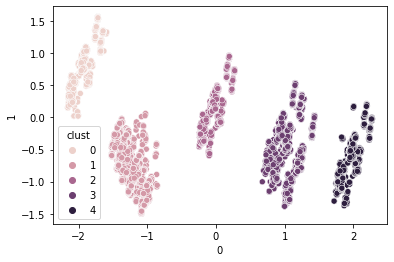

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
axs=plt.subplots()
axs=sns.scatterplot(0,1,hue='clust',data=pca_df)

In [ ]:
clust_df.corr()['clust'].sort_values()

personal_rehabilitation_complete_yn_1   -0.598430
purpose_생활비                             -0.488780
employment_type_기타                      -0.187602
event_CompleteIDCertification           -0.157824
event_StartLoanApply                    -0.154196
event_ViewLoanApplyIntro                -0.151740
event_EndLoanApply                      -0.143989
income_type_OTHERINCOME                 -0.121026
event_OpenApp                           -0.115201
event_Login                             -0.110864
existing_loan_cnt                       -0.090623
income_type_FREELANCER                  -0.085301
event_GetCreditInfo                     -0.070515
event_UseLoanManage                     -0.061816
personal_rehabilitation_complete_yn_2   -0.058869
houseown_type_기타가족소유                    -0.040433
event_SignUp                            -0.032384
income_type_PRACTITIONER                -0.015086
personal_rehabilitation_complete_yn_3   -0.012229
existing_loan_amt                       -0.002692


In [29]:
pd.set_option('display.max_columns', None)

In [30]:
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean

,event_CompleteIDCertification,event_EndLoanApply,event_GetCreditInfo,event_Login,event_OpenApp,event_SignUp,event_StartLoanApply,event_UseDSRCalc,event_UseLoanManage,event_UsePrepayCalc,event_ViewLoanApplyIntro,birth_year,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,company_month,income_type_EARNEDINCOME,income_type_EARNEDINCOME2,income_type_FREELANCER,income_type_OTHERINCOME,income_type_PRACTITIONER,income_type_PRIVATEBUSINESS,employment_type_계약직,employment_type_기타,employment_type_일용직,employment_type_정규직,houseown_type_기타가족소유,houseown_type_배우자,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자,personal_rehabilitation_complete_yn_0,personal_rehabilitation_complete_yn_1,personal_rehabilitation_complete_yn_2,personal_rehabilitation_complete_yn_3
clust,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.004562,0.003316,0.005571,0.005994,0.007216,0.001573,0.007764,0.000598,0.003505,0.000394,0.006345,0.696503,0.659215,0.638138,0.006021,0.005465,0.015779,0.015319,0.053321,0.837147,0.034714,0.001814,0.000302,0.033622,0.092401,0.069685,0.005139,0.010021,0.915155,0.000000,0.000302,0.999698,0.000000,0.025251,0.300642,0.052641,0.561547,0.000535,0.009556,0.033808,0.016020,0.000000,0.990653,0.008208,0.001139
1,0.003157,0.002491,0.003793,0.003428,0.004466,0.001746,0.004755,0.000224,0.002318,0.000448,0.004317,0.723873,0.566803,0.568141,0.003894,0.003143,0.010061,0.004136,0.012988,0.000354,0.028923,0.290569,0.490506,0.004027,0.185620,0.000227,0.999418,0.000354,0.000000,0.331991,0.000536,0.181857,0.485616,0.032096,0.187265,0.089579,0.641094,0.002200,0.026678,0.012862,0.008226,0.287879,0.691687,0.018716,0.001718
2,0.005036,0.003792,0.005572,0.005374,0.007065,0.001995,0.008127,0.000498,0.003695,0.000821,0.006802,0.737925,0.627608,0.573951,0.004344,0.003667,0.012616,0.006882,0.026120,0.818925,0.072020,0.001990,0.000349,0.034835,0.071881,0.113627,0.007400,0.019454,0.859520,0.000000,0.000012,0.000000,0.999988,0.019954,0.289117,0.038872,0.570205,0.000908,0.046377,0.025306,0.009261,0.000000,0.975171,0.022851,0.001978
3,0.001919,0.001440,0.002853,0.002499,0.003541,0.001625,0.003328,0.000643,0.001908,0.000870,0.002776,0.726325,0.634937,0.595056,0.004737,0.004493,0.009721,0.006665,0.032468,0.797696,0.070962,0.005384,0.001514,0.017185,0.107005,0.101969,0.006777,0.020466,0.870533,0.280967,0.003938,0.242191,0.472649,0.026051,0.283043,0.056911,0.537892,0.008170,0.040718,0.033793,0.013166,0.999973,0.000000,0.000027,0.000000
4,0.005790,0.004514,0.006075,0.006005,0.007970,0.002129,0.009366,0.000448,0.004217,0.000865,0.007734,0.746779,0.628466,0.553181,0.004077,0.002882,0.013437,0.005393,0.027251,0.831561,0.069308,0.001690,0.000475,0.034012,0.062953,0.117316,0.008274,0.016566,0.857845,0.999806,0.000194,0.000000,0.000000,0.020720,0.289223,0.035050,0.613143,0.001056,0.017094,0.014066,0.009647,0.000000,0.977572,0.020668,0.001760


In [ ]:
# 정규화 이전
clust_df_non = df2.copy()
clust_df_non['clust'] = pred

In [ ]:
cluster_mean= clust_df_non.groupby('clust').mean()
cluster_mean

,event_CompleteIDCertification,event_EndLoanApply,event_GetCreditInfo,event_Login,event_OpenApp,event_SignUp,event_StartLoanApply,event_UseDSRCalc,event_UseLoanManage,event_UsePrepayCalc,event_ViewLoanApplyIntro,birth_year,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,company_month,income_type_EARNEDINCOME,income_type_EARNEDINCOME2,income_type_FREELANCER,income_type_OTHERINCOME,income_type_PRACTITIONER,income_type_PRIVATEBUSINESS,employment_type_계약직,employment_type_기타,employment_type_일용직,employment_type_정규직,houseown_type_기타가족소유,houseown_type_배우자,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자,personal_rehabilitation_complete_yn_0,personal_rehabilitation_complete_yn_1,personal_rehabilitation_complete_yn_2,personal_rehabilitation_complete_yn_3
clust,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.869561,10.956439,7.411766,8.296692,10.990299,0.085196,7.543505,0.010850,4.646542,0.016028,6.668505,1982.932605,0.695651,633.154002,4.448959e+07,2.272253e+07,3.968944,6.286266e+07,47.707336,0.841271,0.073720,0.001299,0.000439,0.033589,0.049682,0.109776,0.000692,0.017402,0.872131,0.321748,0.000140,0.225131,0.452981,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.975738,0.022542,0.001720
1,2.662735,6.136406,4.991466,4.554140,6.125420,0.062935,3.776890,0.005165,2.825623,0.011229,3.745226,1982.187642,0.575338,641.963167,3.899000e+07,3.137293e+07,2.795701,3.385379e+07,19.107104,0.008462,0.029536,0.287957,0.484774,0.004276,0.184995,0.002506,0.995796,0.001698,0.000000,0.332657,0.000521,0.180710,0.486112,0.032159,0.185031,0.089955,0.642461,0.002174,0.026931,0.012989,0.008300,0.284490,0.694059,0.019637,0.001815
2,3.594495,7.699638,7.692487,6.571836,8.848696,0.048484,5.431330,0.012874,4.638281,0.021867,5.158921,1983.296838,0.706486,691.489969,4.934574e+07,6.014718e+07,3.547789,6.856160e+07,48.737584,0.810050,0.046810,0.001518,0.000247,0.035441,0.105935,0.095825,0.004542,0.013289,0.886344,0.282272,0.000169,0.243404,0.474155,0.049626,0.703531,0.095111,0.000000,0.002011,0.067262,0.056504,0.025955,0.000000,0.991188,0.007786,0.001025
3,1.610597,3.535147,3.743858,3.305945,4.828728,0.058436,2.624853,0.014709,2.315671,0.021637,2.396251,1982.477320,0.699064,668.542876,4.737086e+07,4.519897e+07,2.697546,5.141598e+07,47.480228,0.797298,0.070840,0.005356,0.001519,0.017280,0.107453,0.102004,0.006742,0.020465,0.870537,0.280910,0.003890,0.241446,0.473500,0.027313,0.281550,0.058050,0.535027,0.008207,0.042129,0.034188,0.013283,0.994711,0.000000,0.004716,0.000573


In [ ]:
clust_df_non.corr()['clust']

event_CompleteIDCertification           -0.157824
event_EndLoanApply                      -0.143989
event_GetCreditInfo                     -0.070515
event_Login                             -0.110864
event_OpenApp                           -0.115201
event_SignUp                            -0.032384
event_StartLoanApply                    -0.154196
event_UseDSRCalc                         0.013341
event_UseLoanManage                     -0.061816
event_UsePrepayCalc                      0.013050
event_ViewLoanApplyIntro                -0.151740
birth_year                              -0.002578
gender                                   0.028091
credit_score                             0.116872
yearly_income                            0.016831
desired_amount                           0.053255
existing_loan_cnt                       -0.090623
existing_loan_amt                       -0.002692
company_month                            0.042652
income_type_EARNEDINCOME                 0.114176


In [ ]:
import seaborn as sns
temp = clust_df.groupby('clust').mean()
cluster_mean = temp.transpose()
mean_table = cluster_mean.div(cluster_mean.max(axis = 1), axis = 0)

plt.figure(figsize = (20,25))
annot_kws = {'fontsize':12}
sns.heatmap(mean_table, annot = True, fmt = '.3f', annot_kws = annot_kws, cmap = "Pastel1")
plt.show()

In [ ]:
# 중심점
pd.DataFrame(centers,columns = df2.columns )

,event_CompleteIDCertification,event_EndLoanApply,event_GetCreditInfo,event_Login,event_OpenApp,event_SignUp,event_StartLoanApply,event_UseDSRCalc,event_UseLoanManage,event_UsePrepayCalc,event_ViewLoanApplyIntro,birth_year,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,company_month,income_type_EARNEDINCOME,income_type_EARNEDINCOME2,income_type_FREELANCER,income_type_OTHERINCOME,income_type_PRACTITIONER,income_type_PRIVATEBUSINESS,employment_type_계약직,employment_type_기타,employment_type_일용직,employment_type_정규직,houseown_type_기타가족소유,houseown_type_배우자,houseown_type_자가,houseown_type_전월세,purpose_BUSINESS,purpose_BUYCAR,purpose_BUYHOUSE,purpose_ETC,purpose_HOUSEDEPOSIT,purpose_INVEST,purpose_LIVING,purpose_SWITCHLOAN,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자,personal_rehabilitation_complete_yn_0,personal_rehabilitation_complete_yn_1,personal_rehabilitation_complete_yn_2,personal_rehabilitation_complete_yn_3
0,0.003711,0.002699,0.004760,0.005010,0.006119,0.001493,0.006371,0.000679,0.003001,0.000460,0.005219,0.695539,0.662767,0.643958,0.006018,0.005777,0.014590,0.014767,0.053274,0.836301,0.030577,0.001975,0.000560,0.027961,0.102627,0.063162,0.003670,0.009216,9.239517e-01,1.765255e-13,0.003489,9.965111e-01,-2.306488e-13,4.772563e-04,1.316569e-04,2.139425e-04,3.785136e-04,2.139425e-04,1.316569e-04,1.058192e-02,2.221710e-03,0.025574,0.299849,0.057830,0.534494,0.002962,0.010878,0.037078,0.016984,2.923112e-01,7.010236e-01,0.005859,0.000806
1,0.003804,0.003002,0.004335,0.004001,0.005147,0.001878,0.005702,0.000203,0.002650,0.000401,0.005132,0.725435,0.570961,0.570251,0.003835,0.003027,0.010798,0.004718,0.012955,0.007195,0.027978,0.286147,0.487329,0.004597,0.186753,0.002394,0.996434,0.001172,2.637890e-13,3.330617e-01,0.000204,1.787051e-01,4.880294e-01,-1.653408e-16,-2.521448e-17,3.398974e-17,-1.951564e-18,-5.635141e-17,-1.273938e-17,2.469379e-15,7.786740e-16,0.029735,0.181609,0.086150,0.657515,0.000688,0.024934,0.011716,0.007654,-6.072920e-14,9.795736e-01,0.018847,0.001579
2,0.004835,0.003769,0.005273,0.005102,0.006859,0.002049,0.007877,0.000469,0.003661,0.000890,0.006501,0.745554,0.632162,0.556855,0.004095,0.003011,0.012403,0.005353,0.027190,0.832119,0.065432,0.002075,0.000613,0.028768,0.070992,0.109928,0.005090,0.015480,8.695017e-01,9.998042e-01,0.000196,1.014189e-13,-2.524647e-13,2.741013e-04,5.220978e-05,1.305244e-05,2.741013e-04,1.435769e-04,6.526222e-05,5.677813e-03,1.853447e-03,0.022359,0.287206,0.038818,0.595544,0.002624,0.018822,0.016146,0.010129,2.597175e-01,7.234187e-01,0.015506,0.001357
3,0.001650,0.001293,0.002530,0.002115,0.002923,0.001448,0.002609,0.000270,0.001545,0.000569,0.002428,0.720571,0.572962,0.566716,0.004048,0.003299,0.008249,0.003965,0.013674,0.014248,0.085236,0.270682,0.439509,0.009982,0.179813,0.062903,0.912784,0.020633,3.150704e-03,3.217900e-01,0.003736,1.812073e-01,4.927367e-01,1.477764e-03,1.115293e-04,1.115293e-04,6.970584e-04,6.970584e-04,1.672940e-04,1.391329e-02,1.505646e-03,0.035327,0.196877,0.092569,0.593838,0.006134,0.030949,0.015865,0.009229,9.840234e-01,1.493250e-13,0.014332,0.001645
4,0.004169,0.003131,0.004800,0.004544,0.006065,0.001907,0.006776,0.000538,0.003194,0.000867,0.005677,0.736425,0.631286,0.578767,0.004383,0.003855,0.011614,0.006691,0.026218,0.822266,0.067205,0.002166,0.000287,0.029292,0.078784,0.104166,0.001584,0.017132,8.771173e-01,2.552958e-13,0.000008,1.171008e-13,9.999916e-01,5.477559e-04,5.056208e-05,7.584312e-05,2.359564e-04,2.359564e-04,4.213507e-05,9.303423e-03,1.575852e-03,0.020966,0.285490,0.041790,0.547427,0.002831,0.051363,0.028315,0.009750,2.812684e-01,7.003101e-01,0.016972,0.001449


In [ ]:
log = clust_df.iloc[:,:11]
log['clust'] = clust_df['clust']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

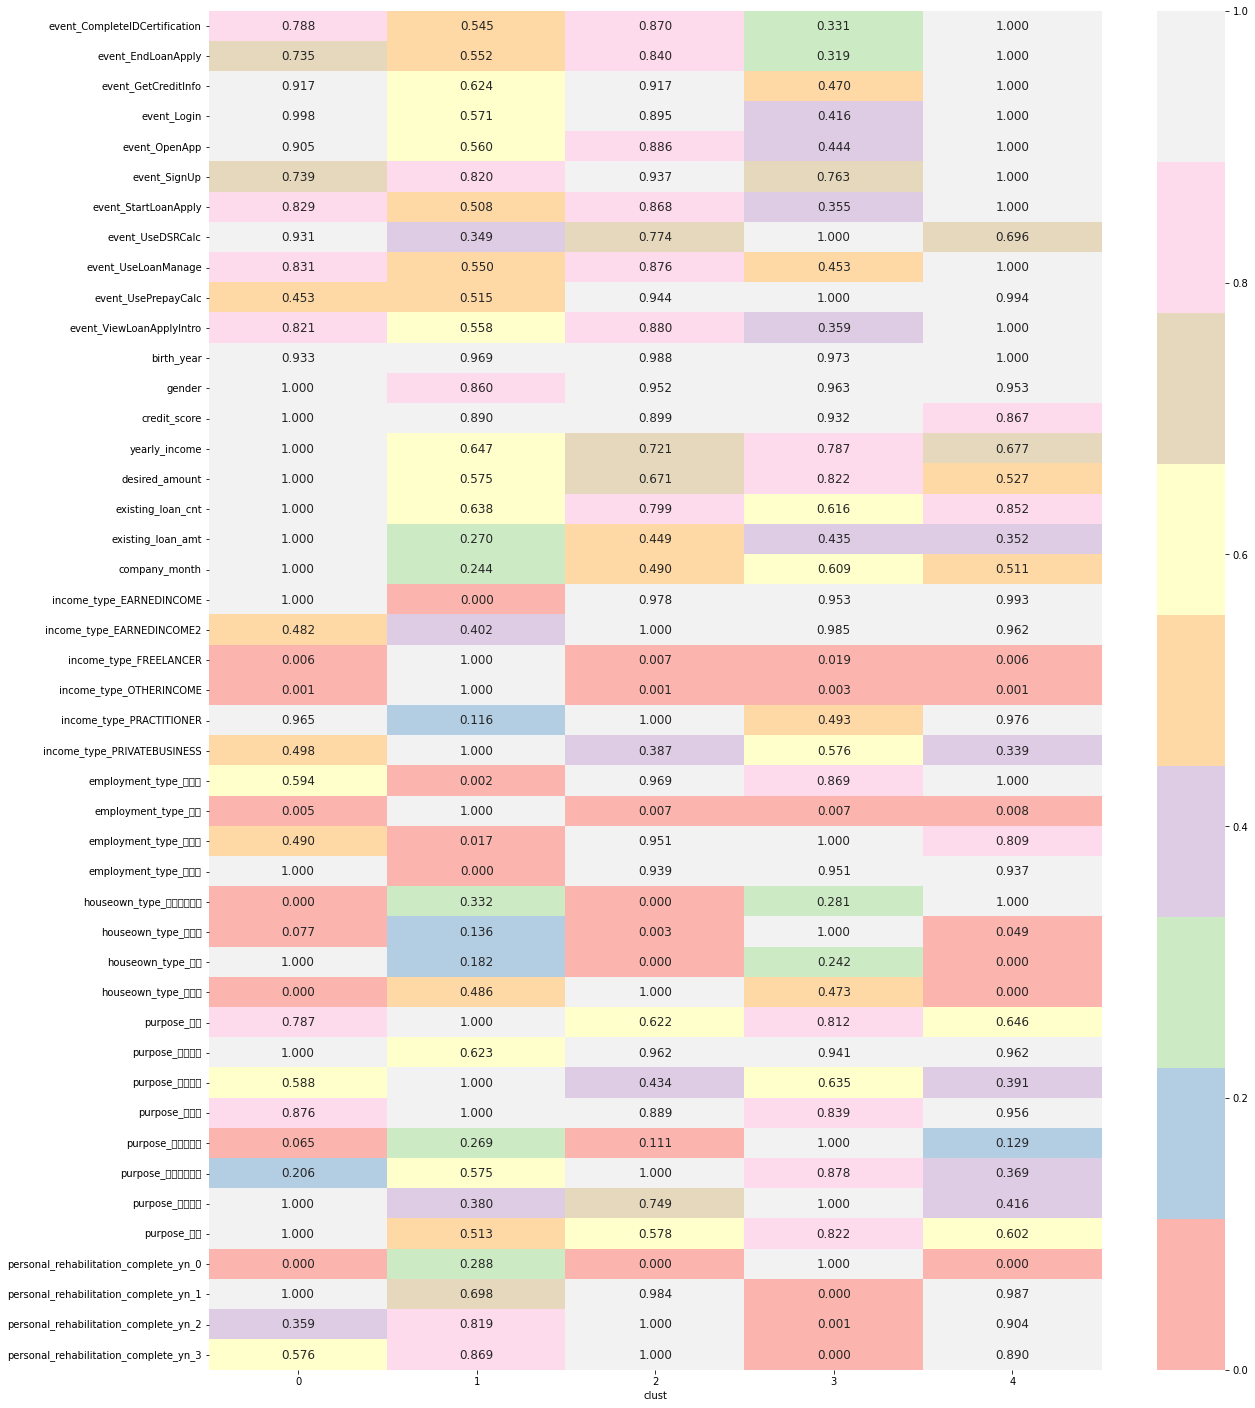

In [31]:
import seaborn as sns
temp = clust_df.groupby('clust').mean()
cluster_mean = temp.transpose()
mean_table = cluster_mean.div(cluster_mean.max(axis = 1), axis = 0)

plt.figure(figsize = (20,25))
annot_kws = {'fontsize':12}
sns.heatmap(mean_table, annot = True, fmt = '.3f', annot_kws = annot_kws, cmap = "Pastel1")
plt.show()

In [ ]:
# 그룹 2개, 3개 나눠서 xy coordinates- log 데이터 기준!!

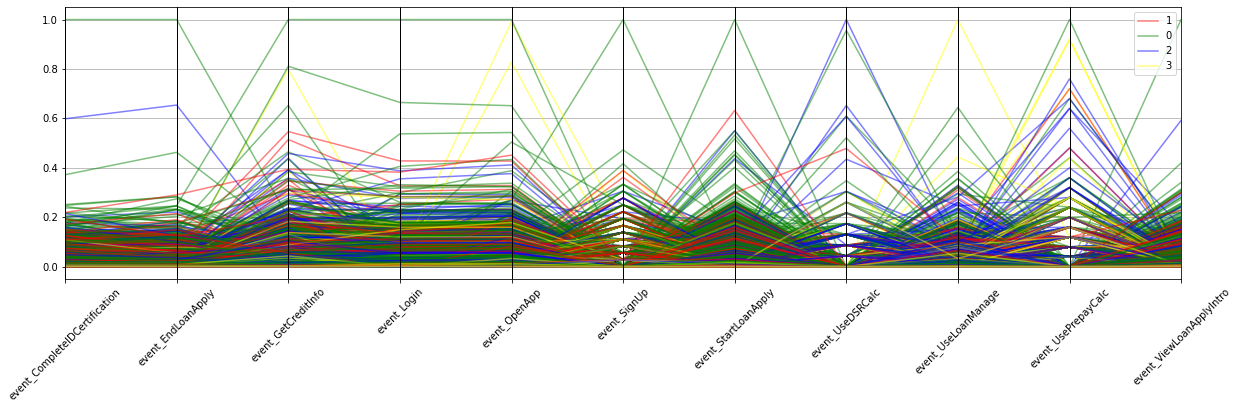

In [ ]:
#from pandas.plotting import parallel_coordinates
#plt.figure(figsize=(20, 5))
#parallel_coordinates(log,'clust',color = ("red","green","blue","yellow"), alpha =0.5)
#plt.xticks(rotation=45)
#plt.show()

In [ ]:
#from pandas.plotting import parallel_coordinates
#plt.figure(figsize=(20, 5))
#parallel_coordinates(clust_df,'clust',color = ("red","green","blue","yellow","purple"), alpha =0.5)
#plt.xticks(rotation=45)
#plt.show()